In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [2]:
N = 64
p = 3

sim = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vx=1, xp=xp
    ),
    nx=N,
    p=p,
    ZS=True,
    adaptive_dt=True,
    CFL=0.8,
    PAD={"rho": (0.0, 1.0)},
)
sim.run(1.0)

100%|██████████| 1.0/1.0 [00:00]                 


In [3]:
sim.MOOD_config

MOODConfig(iter_idx=0, iter_count=0, max_iters=0, cascade=[], cascade_status=[], NAD=False, NAD_rtol=1.0, NAD_atol=0.0, global_dmp=False, include_corners=False, PAD=False, PAD_atol=0.0, SED=False)

In [4]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0))

Text(0, 0.5, 'MOOD iterations/step')

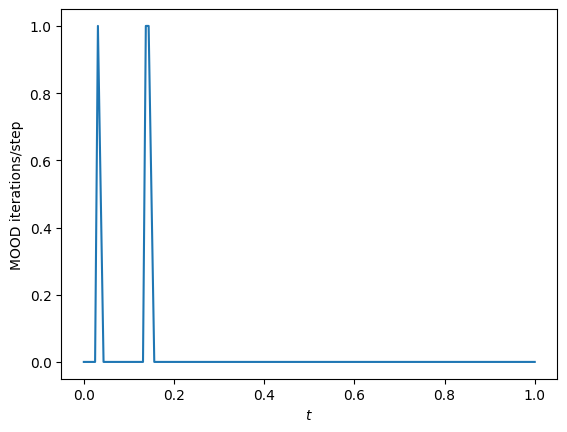

In [5]:
plt.plot(sim.minisnapshots["t"], sim.minisnapshots["n_dt_revisions"])
plt.xlabel(r"$t$")
plt.ylabel(r"MOOD iterations/step")

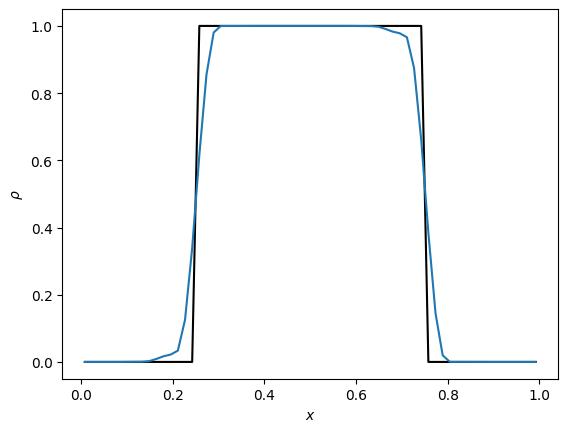

In [6]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, xlabel=True)